# 1 .前置準備

通常来说, 机器学习的方法包括:
监督学习 supervised learning;
非监督学习 unsupervised learning;
半监督学习 semi-supervised learning;
强化学习 reinforcement learning;
遗传算法 genetic algorithm.

keras 可以用各種不同的深度學習套件當底層，在此指定用tensorflow以確保執行的一致性通常来说, 机器学习的方法包括:
Keras 是一个模型级库，为开发深度学习模型提供了高层次的构建模块。它不处理诸如张量乘积和卷积等低级操作。相反，它依赖于一个专门的、优化的张量操作库来完成这个操作，它可以作为 Keras 的「后端引擎」。相比单独地选择一个张量库，而将 Keras 的实现与该库相关联，Keras 以模块方式处理这个问题，并且可以将几个不同的后端引擎无缝嵌入到 Keras 中。

目前，Keras 有三个后端实现可用: TensorFlow 后端，Theano 后端，CNTK 后端。

TensorFlow 是由 Google 开发的一个开源符号级张量操作框架。
Theano 是由蒙特利尔大学的 LISA Lab 开发的一个开源符号级张量操作框架。
CNTK 是由微软开发的一个深度学习开源工具包。

In [16]:
%env KERAS_BACKEND=tensorflow

#Keras 是一个兼容 Theano 和 Tensorflow 的神经网络高级包, 
#用他来组件一个神经网络更加快速, 几条语句就搞定了. 
#而且广泛的兼容性能使 Keras 在 Windows 和 MacOS 或者 Linux 上运行无阻碍.

env: KERAS_BACKEND=tensorflow


In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2.讀入MNIST 資料庫 
MNIST資料庫介紹：MNIST是一個0~9的手寫數字資料庫，它有60000個訓練樣本集和10000個測試樣本集。它是NIST資料庫的一個子集。
MNIST資料庫官方網址為：http://yann.lecun.com/exdb/mnist/ ，也可以在windows下直接下載，train-images-idx3-ubyte.gz、train-labels-idx1-ubyte.gz等。下載四個檔案，解壓縮。解壓縮後發現這些檔案並不是標準的影象格式。這些影象資料都儲存在二進位制檔案中。每個樣本影象的寬高為28*28。

#  2.1 由Keras 讀入MNIST

In [18]:
from keras.datasets import mnist

Using TensorFlow backend.


In [19]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [27]:
len(x_train)

60000

每筆輸入的(x)就是一個手寫的0~9中一個數字的圖檔，大小為28x28,輸出(y)就是正確答案

In [22]:
x_train[9487].shape

(28, 28)

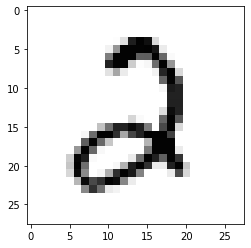

In [28]:
plt.imshow(x_train[9488],cmap="Greys")

In [40]:
 y_train[9488]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 2.3輸入格式整理

標準神經只吃長向量,故需把28X28矩陣 reshape 長向量

In [31]:
x_test.shape

(10000, 28, 28)

In [32]:
x_train = x_train.reshape(60000,784)
x_test  = x_test.reshape(10000,784)

# 2.4數據處理
1-hot encoding
. 1 =>[0,1,0,0,0,0,0,0,0,0]
. 5=>[0,0,0,0,0,1,0,0,0,0]
分類問題基本上都要做這件事,Keras其實已經幫我們準備好套件

In [37]:
from keras.utils import np_utils

In [38]:
y_train = np_utils.to_categorical(y_train,10)

In [39]:
y_test=np_utils.to_categorical(y_test,10)

In [41]:
y_train[9488]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 3 打造第一個神經網路

手寫辨識的資料
輸入：784維的向量 ; 輸出：10維向量

# 3.1 決定神經網路架構,讀入相關套件
Assume :
1.使用2個hidden layer 
2.每個hidden layer 用500個神經元
3.Active function唯一指名：sigmoid

從Keras讀入相關套件

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

# 3.2 建構神經網路

In [46]:
#開一個空的神經網路學習機
#標準ㄧ層一層傳遞的神經網路叫 Sequential,打開一個空的神經網路

model = Sequential()

加第一層神經網路

In [48]:
model.add(Dense(500,input_dim=784))
model.add(Activation("sigmoid"))

加第二層神經網路

In [50]:
model.add(Dense(500))
model.add(Activation("sigmoid"))

輸出

In [51]:
model.add(Dense(10))
model.add(Activation('softmax'))

至此,第一個神經網路完成

# 3.3組裝

In [52]:
model.compile(loss='mse' , optimizer=SGD(lr=0.1) ,
             metrics=['accuracy'])

# 4 檢視神經網路

### 4.1 看model的Summary

In [54]:
#模型名稱.summary()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [55]:
#392500 how to get
784*500+500

392500

In [56]:
#250500
500*500+500

250500

In [57]:
#5010
500*10+10

5010

# 4 畫出結構圖
需先安裝 pydot , graphviz
-conda install pydot
-conda instal graphviz